In [1]:
import networkit as nk
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
import math
import pandas as pd
import re
import os

In [2]:
def extract_last_number_from_file(file_path):
    try:
        with open(file_path, 'r') as file:
            file_contents = file.read()

        # Use a regular expression to find the last number in the text
        match = re.search(r'Final optimal gap: (\d+\.\d+)', file_contents)
        if match:
            last_number = float(match.group(1))
            return last_number
        else:
            return None

    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [3]:
def sort_file_by_column(input_file):
    # Read the contents of the input file
    with open(input_file, 'r') as f:
        lines = f.readlines()

    # Sort the lines based on the value in the 4th column
    sorted_lines = sorted(lines, key=lambda line: float(line.split('\t')[3]))

    # Write the sorted lines to the output file
    with open(input_file, 'w') as f:
        f.writelines(sorted_lines)

def floor_vector(input_vector):
    return [math.floor(x) for x in input_vector]

# d=3

In [4]:
# generate my list of M's : 
N = 200
Number_of_Ms = 25
degree_3 = 3

def round_to_even(values):
    rounded_values = [x if x % 2 == 0 else x - 1 for x in values]
    return rounded_values

# generate the m's
list_of_Ms3 = np.linspace(0,1,Number_of_Ms)
for m in range(len(list_of_Ms3)):
    list_of_Ms3[m] = list_of_Ms3[m]**2
list_of_Ms3 = (2*N*degree_3/np.log10(N))*list_of_Ms3
list_of_Ms3 = np.round(list_of_Ms3)
list_of_Ms3 = round_to_even(list_of_Ms3)
list_of_Ms3 = [num for num in list_of_Ms3 if num != 0] # eliminate all the zeros 
list_of_Ms3 = list(set(list_of_Ms3)) # keep unique elements
list_of_Ms3 = np.sort(list_of_Ms3)
# list_of_Ms = np.int(list_of_Ms)
floor_vector(list_of_Ms3)


# list_of_Ms = list_of_Ms[:16]
print(list_of_Ms3)

# list_of_Ms = [2,4,8,10,14,20,26,32,40,50,60,72,86,100]



[  4.   8.  14.  22.  32.  44.  58.  72.  90. 110. 130. 152. 176. 204.
 232. 262. 292. 326. 362. 398. 438. 478. 522.]


In [5]:
final_tab_of_energies_FW3 = []
final_tab_of_energies_FW3_std = []

final_tab_of_energies_GP3 = []
final_tab_of_energies_GP3_std = []

final_tab_of_energies_MCMC3 = []
final_tab_of_energies_MCMC3_std = []

final_tab_of_energies_BP3 = []
final_tab_of_energies_BP3_std = []

final_tab_of_energies_FWcont3 = []
final_tab_of_energies_FWcont3_std = []


for element_M in list_of_Ms3:
    element_M = math.floor(element_M)

    indices_FW = []
    energies_FW = []
    energies_FWcont = []
    with open('N200_d3/Results_new_FW_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_FW = columns[5]  # Indexing starts from 0
            third_column = columns[3]
            sixth_column = columns[4] 
            indices_FW.append(third_column)
            energies_FW.append(float(fifth_column_FW))
            energies_FWcont.append(float(sixth_column))


    data_FW = {
        'Seed': indices_FW,
        'ResultFW': energies_FW,
        'ResultFWcont': energies_FWcont
    }



    indices_GP = []
    energies_GP = []
    with open('N200_d3/Results_GP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_GP = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_GP.append(third_column)
            energies_GP.append(float(fifth_column_GP))

    data_GP = {
        'Seed': indices_GP,
        'ResultGP': energies_GP
    }

    indices_MCMC = []
    energies_MCMC = []
    with open('N200_d3/Results_MCMC_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_MCMC = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_MCMC.append(third_column)
            energies_MCMC.append(float(fifth_column_MCMC))

    data_MCMC = {
        'Seed': indices_MCMC,
        'ResultMCMC': energies_MCMC
    }

    indices_SP = []
    energies_SP = []
    with open('N200_d3/Results_SP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_SP = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_SP.append(third_column)
            energies_SP.append(float(fifth_column_SP))

    data_SP = {
        'Seed': indices_SP,
        'ResultSP': energies_SP
    }

    data_SP_ = pd.DataFrame(data_SP)
    data_FW_ = pd.DataFrame(data_FW)

    data_GP_ = pd.DataFrame(data_GP)
    data_MCMC_ = pd.DataFrame(data_MCMC)

    data_FWcont_ = pd.DataFrame(data_FW)    
    # data_BP2_ = pd.DataFrame(data_BP_2)


    # Merge the first two DataFrames (data_SP_ and data_GP_) based on 'Seed'
    merged_SP_GP = pd.merge(data_SP_, data_GP_, on='Seed')

    # Merge the third DataFrame (data_EGO_) with the result of the first merge
    merged_SP_FW = pd.merge(data_SP_, data_FW_, on='Seed')

    merged_SP_MCMC = pd.merge(data_SP_, data_MCMC_, on='Seed')

    
    energies_SP_for_FW = merged_SP_FW['ResultSP'].tolist()
    energies_FW_for_FW = merged_SP_FW['ResultFW'].tolist()
    energies_FW_for_FWcont = merged_SP_FW['ResultFWcont'].tolist()

    energies_SP_for_GP = merged_SP_GP['ResultSP'].tolist()
    energies_GP_for_GP = merged_SP_GP['ResultGP'].tolist()

    energies_SP_for_MCMC = merged_SP_MCMC['ResultSP'].tolist()
    energies_MCMC_for_MCMC = merged_SP_MCMC['ResultMCMC'].tolist()


    normalized_GP_energies = []
    for i in range(len(energies_GP)):
        normalized_GP_energies.append((energies_SP_for_GP[i]-energies_GP_for_GP[i]) / energies_SP_for_GP[i])

    normalized_MCMC_energies = []
    for i in range(len(energies_MCMC)):
        normalized_MCMC_energies.append((energies_SP_for_MCMC[i]-energies_MCMC_for_MCMC[i]) / energies_SP_for_MCMC[i])

    normalized_FW_energies = []
    normalized_FWcont_energies = []
    for i in range(len(energies_FW)):
        normalized_FW_energies.append((energies_SP_for_FW[i]-energies_FW_for_FW[i]) / energies_SP_for_FW[i])
        normalized_FWcont_energies.append((energies_SP_for_FW[i]-energies_FW_for_FWcont[i]) / energies_SP_for_FW[i])


    final_tab_of_energies_GP3.append(np.mean(normalized_GP_energies))
    final_tab_of_energies_GP3_std.append(np.std(normalized_GP_energies)/len(normalized_GP_energies))

    final_tab_of_energies_MCMC3.append(np.mean(normalized_MCMC_energies))
    final_tab_of_energies_MCMC3_std.append(np.std(normalized_MCMC_energies)/np.sqrt(len(normalized_MCMC_energies)))

    final_tab_of_energies_FW3.append(np.mean(normalized_FW_energies))
    final_tab_of_energies_FW3_std.append(np.std(normalized_FW_energies)/np.sqrt(len(normalized_FW_energies)))

    final_tab_of_energies_FWcont3.append(np.mean(normalized_FWcont_energies))
    final_tab_of_energies_FWcont3_std.append(np.std(normalized_FWcont_energies)/np.sqrt(len(normalized_FWcont_energies)))


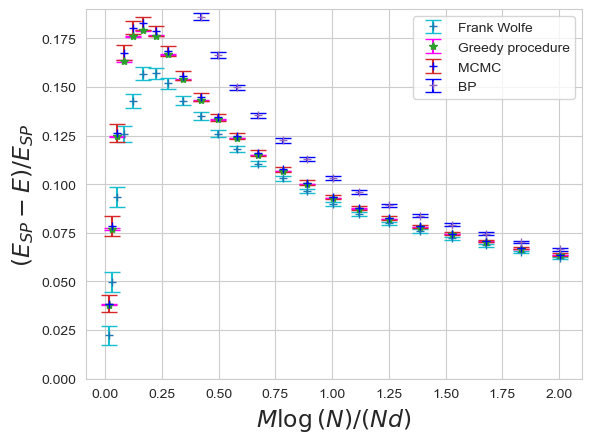

In [6]:
list_of_Ms3 = np.array(list_of_Ms3)
plt.grid()
plt.errorbar(list_of_Ms3*np.log10(N)/(N*degree_3), final_tab_of_energies_FW3, yerr=final_tab_of_energies_FW3_std, fmt='+', color='tab:blue', ecolor='tab:cyan', capsize=6, label='Frank Wolfe')
plt.errorbar(list_of_Ms3*np.log10(N)/(N*degree_3), final_tab_of_energies_GP3, yerr=final_tab_of_energies_GP3_std, fmt='*', color='tab:green', ecolor='magenta', capsize=6, label='Greedy procedure')
plt.errorbar(list_of_Ms3*np.log10(N)/(N*degree_3), final_tab_of_energies_MCMC3, yerr=final_tab_of_energies_MCMC3_std, fmt='+', color='b', ecolor='tab:red', capsize=6, label='MCMC')
plt.errorbar(list_of_Ms3*np.log10(N)/(N*degree_3), final_tab_of_energies_FWcont3, yerr=final_tab_of_energies_FWcont3_std, fmt='+', color='tab:purple', ecolor='b', capsize=6, label='BP')
# plt.errorbar(list_of_Ms200*np.log10(N)/(N*degree), final_tab_of_energies_EGO200, yerr=final_tab_of_energies_EGO200_std, fmt='+', color='tab:brown', ecolor='tab:blue', capsize=6, label='Egoistic')

plt.xlabel(r'$M\log{(N)}/(Nd)$', fontsize=17)
plt.ylabel(r'$(E_{SP}-E)/E_{SP}$', fontsize=17)
plt.ylim([0,0.19])
plt.legend()
plt.grid()
plt.savefig("FW_vs_GP_energies.png",dpi=300)
plt.show()


In [7]:
# generate my list of M's : 
N = 200
Number_of_Ms = 25
degree_6 = 6

def round_to_even(values):
    rounded_values = [x if x % 2 == 0 else x - 1 for x in values]
    return rounded_values

# generate the m's
list_of_Ms6 = np.linspace(0,1,Number_of_Ms)
for m in range(len(list_of_Ms6)):
    list_of_Ms6[m] = list_of_Ms6[m]**2
list_of_Ms6 = (8.3916*N*degree_6*np.log(degree_6)/(2*np.log(N)))*list_of_Ms6
list_of_Ms6 = np.round(list_of_Ms6)
list_of_Ms6 = round_to_even(list_of_Ms6)
list_of_Ms6 = [num for num in list_of_Ms6 if num != 0] # eliminate all the zeros 
list_of_Ms6 = list(set(list_of_Ms6)) # keep unique elements
list_of_Ms6 = np.sort(list_of_Ms6)
# list_of_Ms = np.int(list_of_Ms)
floor_vector(list_of_Ms6)


# list_of_Ms = list_of_Ms[:16]
print(list_of_Ms6)

# list_of_Ms = [2,4,8,10,14,20,26,32,40,50,60,72,86,100]



[   2.   12.   26.   46.   74.  106.  144.  188.  238.  296.  358.  426.
  500.  578.  664.  756.  854.  958. 1066. 1182. 1304. 1430. 1564. 1702.]


In [8]:

final_tab_of_energies_FW6 = []
final_tab_of_energies_FW6_std = []

final_tab_of_energies_GP6 = []
final_tab_of_energies_GP6_std = []

final_tab_of_energies_MCMC6 = []
final_tab_of_energies_MCMC6_std = []

final_tab_of_energies_BP6 = []
final_tab_of_energies_BP6_std = []

final_tab_of_energies_FWcont6 = []
final_tab_of_energies_FWcont6_std = []

for element_M in list_of_Ms6:
    element_M = math.floor(element_M)

    indices_FW = []
    energies_FW = []
    energies_FWcont = []
    with open('N200_d6/Results_prime/Results_new_FW_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_FW = columns[5]  # Indexing starts from 0
            third_column = columns[3]
            sixth_column = columns[4] 
            indices_FW.append(third_column)
            energies_FW.append(float(fifth_column_FW))
            energies_FWcont.append(float(sixth_column))


    data_FW = {
        'Seed': indices_FW,
        'ResultFW': energies_FW,
        'ResultFWcont': energies_FWcont
    }


    indices_GP = []
    energies_GP = []
    with open('N200_d6/Results_prime/Results_GP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_GP = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_GP.append(third_column)
            energies_GP.append(float(fifth_column_GP))

    data_GP = {
        'Seed': indices_GP,
        'ResultGP': energies_GP
    }

    indices_MCMC = []
    energies_MCMC = []
    with open('N200_d6/Results_prime/Results_MCMC_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_MCMC = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_MCMC.append(third_column)
            energies_MCMC.append(float(fifth_column_MCMC))

    data_MCMC = {
        'Seed': indices_MCMC,
        'ResultMCMC': energies_MCMC
    }

    indices_SP = []
    energies_SP = []
    with open('N200_d6/Results_prime/Results_SP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_SP = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_SP.append(third_column)
            energies_SP.append(float(fifth_column_SP))

    data_SP = {
        'Seed': indices_SP,
        'ResultSP': energies_SP
    }

    data_SP_ = pd.DataFrame(data_SP)
    data_FW_ = pd.DataFrame(data_FW)

    data_GP_ = pd.DataFrame(data_GP)
    data_MCMC_ = pd.DataFrame(data_MCMC)


    data_FWcont_ = pd.DataFrame(data_FW)
    # data_BP2_ = pd.DataFrame(data_BP_2)


    # Merge the first two DataFrames (data_SP_ and data_GP_) based on 'Seed'
    merged_SP_GP = pd.merge(data_SP_, data_GP_, on='Seed')

    # Merge the third DataFrame (data_EGO_) with the result of the first merge
    merged_SP_FW = pd.merge(data_SP_, data_FW_, on='Seed')

    merged_SP_MCMC = pd.merge(data_SP_, data_MCMC_, on='Seed')

    
    energies_SP_for_FW = merged_SP_FW['ResultSP'].tolist()
    energies_FW_for_FW = merged_SP_FW['ResultFW'].tolist()
    energies_FW_for_FWcont = merged_SP_FW['ResultFWcont'].tolist()

    energies_SP_for_GP = merged_SP_GP['ResultSP'].tolist()
    energies_GP_for_GP = merged_SP_GP['ResultGP'].tolist()

    energies_SP_for_MCMC = merged_SP_MCMC['ResultSP'].tolist()
    energies_MCMC_for_MCMC = merged_SP_MCMC['ResultMCMC'].tolist()


    normalized_GP_energies = []
    for i in range(len(energies_GP_for_GP)):
        normalized_GP_energies.append((energies_SP_for_GP[i]-energies_GP_for_GP[i]) / energies_SP_for_GP[i])

    normalized_MCMC_energies = []
    for i in range(len(energies_SP_for_MCMC)):
        normalized_MCMC_energies.append((energies_SP_for_MCMC[i]-energies_MCMC_for_MCMC[i]) / energies_SP_for_MCMC[i])

    normalized_FW_energies = []
    normalized_FWcont_energies = []
    for i in range(len(energies_FW_for_FW)):
        normalized_FW_energies.append((energies_SP_for_FW[i]-energies_FW_for_FW[i]) / energies_SP_for_FW[i])
        normalized_FWcont_energies.append((energies_SP_for_FW[i]-energies_FW_for_FWcont[i]) / energies_SP_for_FW[i])


    final_tab_of_energies_GP6.append(np.mean(normalized_GP_energies))
    final_tab_of_energies_GP6_std.append(np.std(normalized_GP_energies)/len(normalized_GP_energies))

    final_tab_of_energies_MCMC6.append(np.mean(normalized_MCMC_energies))
    final_tab_of_energies_MCMC6_std.append(np.std(normalized_MCMC_energies)/np.sqrt(len(normalized_MCMC_energies)))

    final_tab_of_energies_FW6.append(np.mean(normalized_FW_energies))
    final_tab_of_energies_FW6_std.append(np.std(normalized_FW_energies)/np.sqrt(len(normalized_FW_energies)))

    final_tab_of_energies_FWcont6.append(np.mean(normalized_FWcont_energies))
    final_tab_of_energies_FWcont6_std.append(np.std(normalized_FWcont_energies)/np.sqrt(len(normalized_FWcont_energies)))

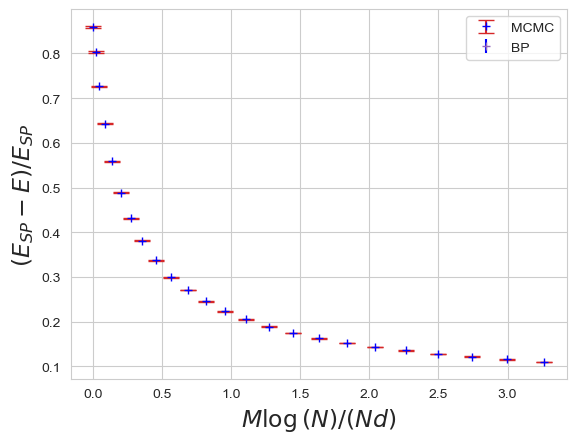

In [9]:
list_of_Ms6 = np.array(list_of_Ms6)
plt.grid()
#plt.errorbar(list_of_Ms6*np.log10(N)/(N*degree_6), final_tab_of_energies_FW6, yerr=final_tab_of_energies_FW6_std, fmt='+', color='tab:blue', ecolor='tab:cyan', capsize=6, label='Frank Wolfe')
#plt.errorbar(list_of_Ms6*np.log10(N)/(N*degree_6), final_tab_of_energies_GP6, yerr=final_tab_of_energies_GP6_std, fmt='*', color='tab:green', ecolor='magenta', capsize=6, label='Greedy procedure')
#plt.errorbar(list_of_Ms6*np.log10(N)/(N*degree_6), final_tab_of_energies_MCMC6, yerr=final_tab_of_energies_MCMC6_std, fmt='+', color='b', ecolor='tab:red', capsize=6, label='MCMC')
plt.errorbar(list_of_Ms6*np.log10(N)/(N*degree_6), final_tab_of_energies_FWcont6, yerr=final_tab_of_energies_FWcont6_std, fmt='+', color='b', ecolor='tab:red', capsize=6, label='MCMC')
plt.errorbar(list_of_Ms6[:len(final_tab_of_energies_BP6)]*np.log10(N)/(N*degree_6), final_tab_of_energies_BP6, yerr=final_tab_of_energies_BP6_std, fmt='+', color='tab:purple', ecolor='b', capsize=6, label='BP')

plt.xlabel(r'$M\log{(N)}/(Nd)$', fontsize=17)
plt.ylabel(r'$(E_{SP}-E)/E_{SP}$', fontsize=17)

plt.legend()
plt.grid()
plt.savefig("FW_vs_GP_energies.png",dpi=300)
plt.show()

### On dirait que BP commence a faire de la merde a partir de 1 et qlq 

### d=12


In [10]:
# generate my list of M's : 
N = 200
Number_of_Ms = 25
degree_12 = 12

def round_to_even(values):
    rounded_values = [x if x % 2 == 0 else x - 1 for x in values]
    return rounded_values

# generate the m's
list_of_Ms12 = np.linspace(0,1,Number_of_Ms)
for m in range(len(list_of_Ms12)):
    list_of_Ms12[m] = list_of_Ms12[m]**2
list_of_Ms12 = (8.3916*N*degree_12*np.log(degree_12)/(2*np.log(N)))*list_of_Ms12
list_of_Ms12 = np.round(list_of_Ms12)
list_of_Ms12 = round_to_even(list_of_Ms12)
list_of_Ms12 = [num for num in list_of_Ms12 if num != 0] # eliminate all the zeros 
list_of_Ms12 = list(set(list_of_Ms12)) # keep unique elements
list_of_Ms12 = np.sort(list_of_Ms12)
# list_of_Ms = np.int(list_of_Ms)
floor_vector(list_of_Ms12)


# list_of_Ms = list_of_Ms[:16]
print(list_of_Ms12)

[   8.   32.   74.  130.  204.  294.  402.  524.  664.  820.  992. 1180.
 1386. 1606. 1844. 2098. 2370. 2656. 2960. 3280. 3616. 3968. 4336. 4722.]


In [11]:

final_tab_of_energies_FW12 = []
final_tab_of_energies_FW12_std = []

final_tab_of_energies_GP12 = []
final_tab_of_energies_GP12_std = []

final_tab_of_energies_MCMC12 = []
final_tab_of_energies_MCMC12_std = []

final_tab_of_energies_FWcont12 = []
final_tab_of_energies_FWcont12_std = []

for element_M in list_of_Ms12:
    element_M = math.floor(element_M)

    indices_FW = []
    energies_FW = []
    energies_FWcont = []
    with open('N200_d12/Results_prime/Results_new_FW_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_FW = columns[5]  # Indexing starts from 0
            third_column = columns[3]
            sixth_column = columns[4] 
            indices_FW.append(third_column)
            energies_FW.append(float(fifth_column_FW))
            energies_FWcont.append(float(sixth_column))


    data_FW = {
        'Seed': indices_FW,
        'ResultFW': energies_FW,
        'ResultFWcont': energies_FWcont
    }


    indices_GP = []
    energies_GP = []
    with open('N200_d12/Results_prime/Results_GP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_GP = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_GP.append(third_column)
            energies_GP.append(float(fifth_column_GP))

    data_GP = {
        'Seed': indices_GP,
        'ResultGP': energies_GP
    }

    indices_MCMC = []
    energies_MCMC = []
    with open('N200_d12/Results_prime/Results_MCMC_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_MCMC = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_MCMC.append(third_column)
            energies_MCMC.append(float(fifth_column_MCMC))

    data_MCMC = {
        'Seed': indices_MCMC,
        'ResultMCMC': energies_MCMC
    }

    indices_SP = []
    energies_SP = []
    with open('N200_d12/Results_prime/Results_SP_M='+str(element_M)+'.dat', 'r') as file:
        for line in file:
            columns = line.split()  
            fifth_column_SP = columns[4]  # Indexing starts from 0
            third_column = columns[3]
            indices_SP.append(third_column)
            energies_SP.append(float(fifth_column_SP))

    data_SP = {
        'Seed': indices_SP,
        'ResultSP': energies_SP
    }

    data_SP_ = pd.DataFrame(data_SP)
    data_FW_ = pd.DataFrame(data_FW)

    data_GP_ = pd.DataFrame(data_GP)
    data_MCMC_ = pd.DataFrame(data_MCMC)


    data_FWcont_ = pd.DataFrame(data_FW)
    # data_BP2_ = pd.DataFrame(data_BP_2)


    # Merge the first two DataFrames (data_SP_ and data_GP_) based on 'Seed'
    merged_SP_GP = pd.merge(data_SP_, data_GP_, on='Seed')

    # Merge the third DataFrame (data_EGO_) with the result of the first merge
    merged_SP_FW = pd.merge(data_SP_, data_FW_, on='Seed')

    merged_SP_MCMC = pd.merge(data_SP_, data_MCMC_, on='Seed')

    
    energies_SP_for_FW = merged_SP_FW['ResultSP'].tolist()
    energies_FW_for_FW = merged_SP_FW['ResultFW'].tolist()
    energies_FW_for_FWcont = merged_SP_FW['ResultFWcont'].tolist()

    energies_SP_for_GP = merged_SP_GP['ResultSP'].tolist()
    energies_GP_for_GP = merged_SP_GP['ResultGP'].tolist()

    energies_SP_for_MCMC = merged_SP_MCMC['ResultSP'].tolist()
    energies_MCMC_for_MCMC = merged_SP_MCMC['ResultMCMC'].tolist()


    normalized_GP_energies = []
    for i in range(len(energies_GP_for_GP)):
        normalized_GP_energies.append((energies_SP_for_GP[i]-energies_GP_for_GP[i]) / energies_SP_for_GP[i])

    normalized_MCMC_energies = []
    for i in range(len(energies_SP_for_MCMC)):
        normalized_MCMC_energies.append((energies_SP_for_MCMC[i]-energies_MCMC_for_MCMC[i]) / energies_SP_for_MCMC[i])

    normalized_FW_energies = []
    normalized_FWcont_energies = []
    for i in range(len(energies_FW_for_FW)):
        normalized_FW_energies.append((energies_SP_for_FW[i]-energies_FW_for_FW[i]) / energies_SP_for_FW[i])
        normalized_FWcont_energies.append((energies_SP_for_FW[i]-energies_FW_for_FWcont[i]) / energies_SP_for_FW[i])


    final_tab_of_energies_GP12.append(np.mean(normalized_GP_energies))
    final_tab_of_energies_GP12_std.append(np.std(normalized_GP_energies)/len(normalized_GP_energies))

    final_tab_of_energies_MCMC12.append(np.mean(normalized_MCMC_energies))
    final_tab_of_energies_MCMC12_std.append(np.std(normalized_MCMC_energies)/np.sqrt(len(normalized_MCMC_energies)))

    final_tab_of_energies_FW12.append(np.mean(normalized_FW_energies))
    final_tab_of_energies_FW12_std.append(np.std(normalized_FW_energies)/np.sqrt(len(normalized_FW_energies)))

    final_tab_of_energies_FWcont12.append(np.mean(normalized_FWcont_energies))
    final_tab_of_energies_FWcont12_std.append(np.std(normalized_FWcont_energies)/np.sqrt(len(normalized_FWcont_energies)))

# BP 

# Greedy procedure 

In [12]:
import matplotlib
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'weight' : 'bold'})
rc('text', usetex=True)

matplotlib.rcParams.update({'font.size': 10})

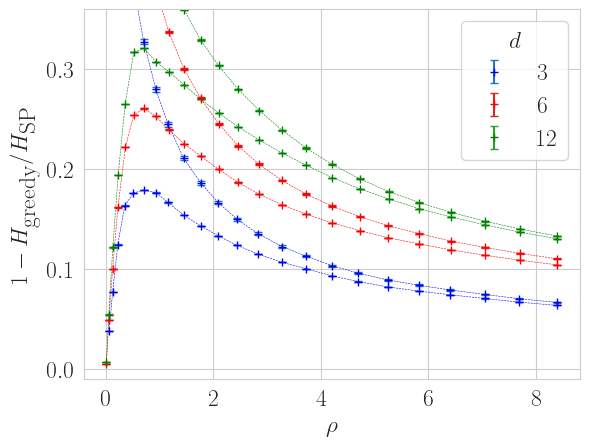

In [13]:
matplotlib.rcParams.update({'font.size': 17})

plt.grid()
plt.errorbar(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_GP3, yerr=final_tab_of_energies_GP3_std, fmt='+', color='b', ecolor='tab:blue', capsize=3, label='3')
plt.errorbar(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_GP6, yerr=final_tab_of_energies_GP6_std, fmt='+', color='r', ecolor='tab:red', capsize=3, label='6')
#plt.errorbar(list_of_Ms9*np.log10(N)/(N*degree_9), final_tab_of_energies_GP9, yerr=final_tab_of_energies_GP9_std, fmt='+', color='g', ecolor='tab:green', capsize=3, label='d=9')
plt.errorbar(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_GP12, yerr=final_tab_of_energies_GP12_std, fmt='+', color='g', ecolor='tab:green', capsize=3, label='12')


line =0.4
plt.plot(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_GP3, linestyle='--', color='b',linewidth=line)
plt.plot(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_GP6, linestyle='--', color='r',linewidth=line)
#plt.plot(list_of_Ms9*np.log10(N)/(N*degree_9), final_tab_of_energies_GP9, linestyle='--', color='g',linewidth=line)
plt.plot(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_GP12, linestyle='--', color='g',linewidth=line)

alpha = 1
font = 15
plt.errorbar(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_FWcont3, yerr=final_tab_of_energies_FWcont3_std,alpha=alpha, fmt='+', color='b', ecolor='tab:blue', capsize=3)
plt.errorbar(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_FWcont6, yerr=final_tab_of_energies_FWcont6_std,alpha=alpha, fmt='+', color='r', ecolor='tab:red', capsize=3)
#plt.errorbar(list_of_Ms9*np.log10(N)/(N*degree_9), final_tab_of_energies_FW9, yerr=final_tab_of_energies_FW9_std, fmt='+', color='g', ecolor='tab:green', capsize=3, label='d=12')
plt.errorbar(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_FWcont12, yerr=final_tab_of_energies_FWcont12_std,alpha=alpha, fmt='+', color='g', ecolor='tab:green', capsize=3)
line =0.4
plt.plot(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_FWcont3,alpha=alpha, linestyle='--', color='b',linewidth=line)
plt.plot(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_FWcont6,alpha=alpha, linestyle='--', color='r',linewidth=line)
#plt.plot(list_of_Ms9*np.log10(N)/(N*degree_9), final_tab_of_energies_FW9, linestyle='--', color='g',linewidth=line)
plt.plot(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_FWcont12,alpha=alpha, linestyle='--', color='g',linewidth=line)

plt.xlabel(r'$\rho$')
plt.ylabel(r'$1-H_{\textnormal{greedy}}/H_{\textnormal{SP}}$')
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=4)
plt.xticks()
plt.yticks()
plt.legend(title=r'$d$')
plt.ylim([-0.01,0.36])
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=6)
plt.grid()
plt.savefig("gamma2_N200_varyd_GP.pdf",dpi=500, bbox_inches='tight')
plt.show()

# MCMC

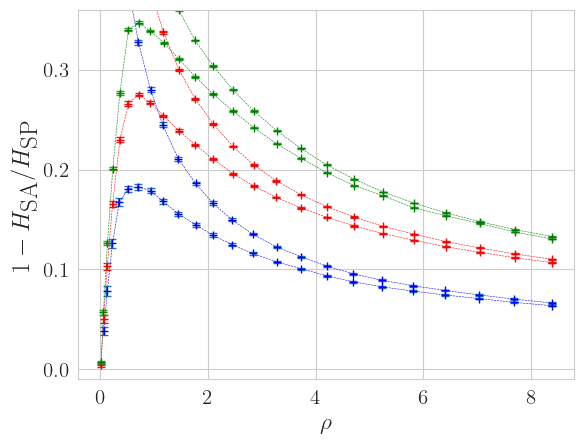

In [14]:
plt.grid()
plt.errorbar(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_MCMC3, yerr=final_tab_of_energies_MCMC3_std, fmt='+', color='b', ecolor='tab:blue', capsize=3, label='d=3')
plt.errorbar(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_MCMC6, yerr=final_tab_of_energies_MCMC6_std, fmt='+', color='r', ecolor='tab:red', capsize=3, label='d=6')
#plt.errorbar(list_of_Ms9*np.log10(N)/(N*degree_9), final_tab_of_energies_MCMC9, yerr=final_tab_of_energies_MCMC9_std, fmt='+', color='g', ecolor='tab:green', capsize=3, label='d=9')
plt.errorbar(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_MCMC12, yerr=final_tab_of_energies_MCMC12_std, fmt='+', color='g', ecolor='tab:green', capsize=3, label='d=12')

line =0.4
plt.plot(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_MCMC3, linestyle='--', color='b',linewidth=line)
plt.plot(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_MCMC6, linestyle='--', color='r',linewidth=line)
#plt.plot(list_of_Ms9*np.log10(N)/(N*degree_9), final_tab_of_energies_MCMC9, linestyle='--', color='g',linewidth=line)
plt.plot(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_MCMC12, linestyle='--', color='g',linewidth=line)


alpha=1
plt.errorbar(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_FWcont3, yerr=final_tab_of_energies_FWcont3_std,alpha=alpha, fmt='+', color='b', ecolor='tab:blue', capsize=3)
plt.errorbar(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_FWcont6, yerr=final_tab_of_energies_FWcont6_std,alpha=alpha, fmt='+', color='r', ecolor='tab:red', capsize=3)
#plt.errorbar(list_of_Ms9*np.log10(N)/(N*degree_9), final_tab_of_energies_FW9, yerr=final_tab_of_energies_FW9_std, fmt='+', color='g', ecolor='tab:green', capsize=3, label='d=12')
plt.errorbar(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_FWcont12, yerr=final_tab_of_energies_FWcont12_std,alpha=alpha, fmt='+', color='g', ecolor='tab:green', capsize=3)
line =0.4
plt.plot(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_FWcont3,alpha=alpha, linestyle='--', color='b',linewidth=line)
plt.plot(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_FWcont6,alpha=alpha, linestyle='--', color='r',linewidth=line)
#plt.plot(list_of_Ms9*np.log10(N)/(N*degree_9), final_tab_of_energies_FW9, linestyle='--', color='g',linewidth=line)
plt.plot(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_FWcont12,alpha=alpha, linestyle='--', color='g',linewidth=line)


plt.xlabel(r'$\rho$') 
plt.ylabel(r'$1-H_{\textnormal{SA}}/H_{\textnormal{SP}}$', fontsize=font+3)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=4)
plt.xticks(fontsize=font)
plt.yticks(fontsize=font)
#plt.legend(fontsize=font)
plt.ylim([-0.01,0.36])
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=6)
plt.grid()
plt.savefig("gamma2_N200_varyd_MCMC.pdf",dpi=500, bbox_inches='tight')
plt.show()

# FW

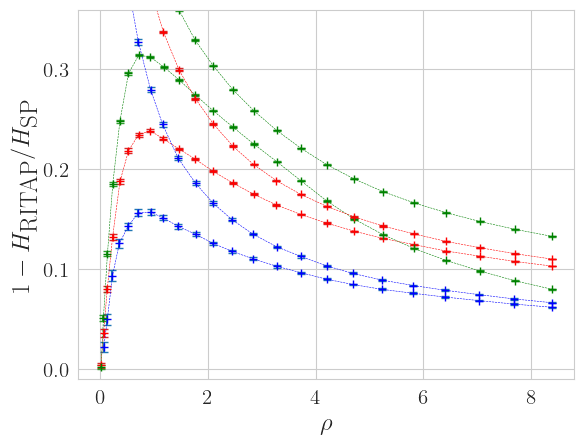

In [15]:
plt.grid()
plt.errorbar(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_FW3, yerr=final_tab_of_energies_FW3_std, fmt='+', color='b', ecolor='tab:blue', capsize=3, label='d=3')
plt.errorbar(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_FW6, yerr=final_tab_of_energies_FW6_std, fmt='+', color='r', ecolor='tab:red', capsize=3, label='d=6')
#plt.errorbar(list_of_Ms9*np.log10(N)/(N*degree_9), final_tab_of_energies_FW9, yerr=final_tab_of_energies_FW9_std, fmt='+', color='g', ecolor='tab:green', capsize=3, label='d=12')
plt.errorbar(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_FW12, yerr=final_tab_of_energies_FW12_std, fmt='+', color='g', ecolor='tab:green', capsize=3, label='d=12')


line =0.4
plt.plot(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_FW3, linestyle='--', color='b',linewidth=line)
plt.plot(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_FW6, linestyle='--', color='r',linewidth=line)
#plt.plot(list_of_Ms9*np.log10(N)/(N*degree_9), final_tab_of_energies_FW9, linestyle='--', color='g',linewidth=line)
plt.plot(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_FW12, linestyle='--', color='g',linewidth=line)


alpha=1
plt.errorbar(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_FWcont3, yerr=final_tab_of_energies_FWcont3_std,alpha=alpha, fmt='+', color='b', ecolor='tab:blue', capsize=3)
plt.errorbar(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_FWcont6, yerr=final_tab_of_energies_FWcont6_std,alpha=alpha, fmt='+', color='r', ecolor='tab:red', capsize=3)
#plt.errorbar(list_of_Ms9*np.log10(N)/(N*degree_9), final_tab_of_energies_FW9, yerr=final_tab_of_energies_FW9_std, fmt='+', color='g', ecolor='tab:green', capsize=3, label='d=12')
plt.errorbar(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_FWcont12, yerr=final_tab_of_energies_FWcont12_std,alpha=alpha, fmt='+', color='g', ecolor='tab:green', capsize=3)
line =0.4
plt.plot(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_FWcont3,alpha=alpha, linestyle='--', color='b',linewidth=line)
plt.plot(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_FWcont6,alpha=alpha, linestyle='--', color='r',linewidth=line)
#plt.plot(list_of_Ms9*np.log10(N)/(N*degree_9), final_tab_of_energies_FW9, linestyle='--', color='g',linewidth=line)
plt.plot(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_FWcont12,alpha=alpha, linestyle='--', color='g',linewidth=line)

plt.xlabel(r'$\rho$', fontsize=font+3)
plt.ylabel(r'$1-H_{\textnormal{RITAP}}/H_{\textnormal{SP}}$', fontsize=font+3)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=4)
plt.xticks(fontsize=font)
plt.yticks(fontsize=font)
#plt.legend(fontsize=font)
plt.ylim([-0.01,0.36])
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=6)
#plt.legend(title=r'$d$', fontsize=15,title_fontsize=15)
plt.grid()
plt.savefig("gamma2_N200_varyd_FW.pdf",dpi=500, bbox_inches='tight')
plt.show()

8.388157295232896


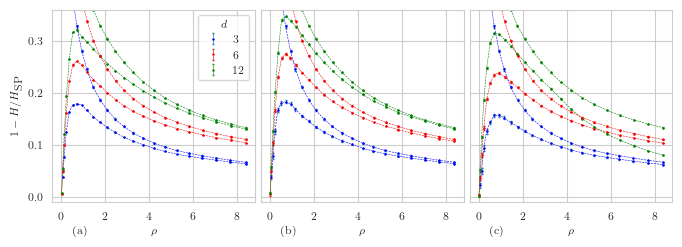

In [26]:
import matplotlib
matplotlib.rcParams.update({'text.usetex':True,'font.size':8})
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 2.5),gridspec_kw={'wspace':0.03}, sharey=True)
cap = 1
markersize_ = 1
err_w = 0.5
# First subplot ------------------------------------------------------------------------------
ax1.grid()
ax1.errorbar(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_GP3, yerr=final_tab_of_energies_GP3_std, fmt='+', color='b', ecolor='tab:blue',markersize=markersize_, capsize=cap, label='3', elinewidth=err_w)
ax1.errorbar(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_GP6, yerr=final_tab_of_energies_GP6_std, fmt='+', color='r', ecolor='tab:red',markersize=markersize_, capsize=cap, label='6', elinewidth=err_w)
ax1.errorbar(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_GP12, yerr=final_tab_of_energies_GP12_std, fmt='+', color='g', ecolor='tab:green',markersize=markersize_, capsize=cap, label='12', elinewidth=err_w)
line =0.4
ax1.plot(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_GP3, linestyle='--', color='b',linewidth=line)
ax1.plot(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_GP6, linestyle='--', color='r',linewidth=line)
ax1.plot(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_GP12, linestyle='--', color='g',linewidth=line)
alpha = 1
font = 15
ax1.errorbar(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_FWcont3, yerr=final_tab_of_energies_FWcont3_std,alpha=alpha, fmt='+', color='b',markersize=markersize_, ecolor='tab:blue', capsize=cap, elinewidth=err_w)
ax1.errorbar(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_FWcont6, yerr=final_tab_of_energies_FWcont6_std,alpha=alpha, fmt='+', color='r',markersize=markersize_, ecolor='tab:red', capsize=cap, elinewidth=err_w)
ax1.errorbar(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_FWcont12, yerr=final_tab_of_energies_FWcont12_std,alpha=alpha, fmt='+', color='g',markersize=markersize_, ecolor='tab:green', capsize=cap, elinewidth=err_w)
line =0.4
ax1.plot(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_FWcont3,alpha=alpha, linestyle='--', color='b',linewidth=line)
ax1.plot(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_FWcont6,alpha=alpha, linestyle='--', color='r',linewidth=line)
ax1.plot(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_FWcont12,alpha=alpha, linestyle='--', color='g',linewidth=line)

print(2*1702*np.log(N)/(N*degree_6*np.log(degree_6))) 

ax1.set_xlabel(r'$\rho$')
ax1.set_ylabel(r'$1-H/H_{\textnormal{SP}}$')
ax1.locator_params(axis='x', nbins=5)
ax1.locator_params(axis='y', nbins=4)
ax1.legend(title=r'$d$')
ax1.set_ylim([-0.01,0.36])
ax1.grid()

# Second subplot ------------------------------------------------------------------------------
ax2.grid()
ax2.errorbar(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_MCMC3, yerr=final_tab_of_energies_MCMC3_std, fmt='+', color='b', ecolor='tab:blue',markersize=markersize_, capsize=cap, label='d=3', elinewidth=err_w)
ax2.errorbar(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_MCMC6, yerr=final_tab_of_energies_MCMC6_std, fmt='+', color='r', ecolor='tab:red',markersize=markersize_, capsize=cap, label='d=6', elinewidth=err_w)
ax2.errorbar(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_MCMC12, yerr=final_tab_of_energies_MCMC12_std, fmt='+', color='g', ecolor='tab:green',markersize=markersize_, capsize=cap, label='d=12', elinewidth=err_w)
line =0.4
ax2.plot(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_MCMC3, linestyle='--', color='b',linewidth=line)
ax2.plot(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_MCMC6, linestyle='--', color='r',linewidth=line)
ax2.plot(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_MCMC12, linestyle='--', color='g',linewidth=line)
alpha=1
ax2.errorbar(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_FWcont3, yerr=final_tab_of_energies_FWcont3_std,alpha=alpha, fmt='+', color='b',markersize=markersize_, ecolor='tab:blue', capsize=cap, elinewidth=err_w)
ax2.errorbar(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_FWcont6, yerr=final_tab_of_energies_FWcont6_std,alpha=alpha, fmt='+', color='r',markersize=markersize_, ecolor='tab:red', capsize=cap, elinewidth=err_w)
ax2.errorbar(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_FWcont12, yerr=final_tab_of_energies_FWcont12_std,alpha=alpha, fmt='+', color='g',markersize=markersize_, ecolor='tab:green', capsize=cap, elinewidth=err_w)
line =0.4
ax2.plot(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_FWcont3,alpha=alpha, linestyle='--', color='b',linewidth=line)
ax2.plot(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_FWcont6,alpha=alpha, linestyle='--', color='r',linewidth=line)
ax2.plot(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_FWcont12,alpha=alpha, linestyle='--', color='g',linewidth=line)

ax2.set_xlabel(r'$\rho$')
ax2.locator_params(axis='x', nbins=5)
ax2.locator_params(axis='y', nbins=4)
ax2.set_ylim([-0.01,0.36])
ax2.grid()

# Third subplot ------------------------------------------------------------------------------
ax3.grid()
ax3.errorbar(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_FW3, yerr=final_tab_of_energies_FW3_std, fmt='+', color='b', ecolor='tab:blue',markersize=markersize_, capsize=cap, label='d=3', elinewidth=err_w)
ax3.errorbar(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_FW6, yerr=final_tab_of_energies_FW6_std, fmt='+', color='r', ecolor='tab:red',markersize=markersize_, capsize=cap, label='d=6', elinewidth=err_w)
ax3.errorbar(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_FW12, yerr=final_tab_of_energies_FW12_std, fmt='+', color='g', ecolor='tab:green',markersize=markersize_, capsize=cap, label='d=12', elinewidth=err_w)
line =0.4
ax3.plot(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_FW3, linestyle='--', color='b',linewidth=line)
ax3.plot(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_FW6, linestyle='--', color='r',linewidth=line)
ax3.plot(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_FW12, linestyle='--', color='g',linewidth=line)
alpha=1
ax3.errorbar(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_FWcont3, yerr=final_tab_of_energies_FWcont3_std,alpha=alpha, fmt='+', color='b',markersize=markersize_, ecolor='tab:blue', capsize=cap, elinewidth=err_w)
ax3.errorbar(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_FWcont6, yerr=final_tab_of_energies_FWcont6_std,alpha=alpha, fmt='+', color='r',markersize=markersize_, ecolor='tab:red', capsize=cap, elinewidth=err_w)
ax3.errorbar(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_FWcont12, yerr=final_tab_of_energies_FWcont12_std,alpha=alpha, fmt='+', color='g',markersize=markersize_, ecolor='tab:green', capsize=cap, elinewidth=err_w)
line =0.4
ax3.plot(2*list_of_Ms3*np.log(N)/(N*degree_3*np.log(degree_3)), final_tab_of_energies_FWcont3,alpha=alpha, linestyle='--', color='b',linewidth=line)
ax3.plot(2*list_of_Ms6*np.log(N)/(N*degree_6*np.log(degree_6)), final_tab_of_energies_FWcont6,alpha=alpha, linestyle='--', color='r',linewidth=line)
ax3.plot(2*list_of_Ms12*np.log(N)/(N*degree_12*np.log(degree_12)), final_tab_of_energies_FWcont12,alpha=alpha, linestyle='--', color='g',linewidth=line)

ax3.set_xlabel(r'$\rho$')
ax3.locator_params(axis='x', nbins=5)
ax3.locator_params(axis='y', nbins=4)
ax3.set_ylim([-0.01,0.36])
ax3.grid()

ax1.text(0.1, -0.12, "(a)", transform=ax1.transAxes, verticalalignment='top', horizontalalignment='left')
ax2.text(0.1, -0.12, "(b)", transform=ax2.transAxes, verticalalignment='top', horizontalalignment='left')
ax3.text(0.1, -0.12, "(c)", transform=ax3.transAxes, verticalalignment='top', horizontalalignment='left')
plt.savefig("gamma2_varyd_combined.pdf", dpi=500, bbox_inches='tight')
plt.show()

# Investigate number of converging seeds : 

In [17]:
def count_lines(file_path):
    try:
        with open(file_path, 'r') as file:
            lines = file.readlines()
            return len(lines)
    except FileNotFoundError:
        print("File not found.")
        return -1

0.1721953144128112


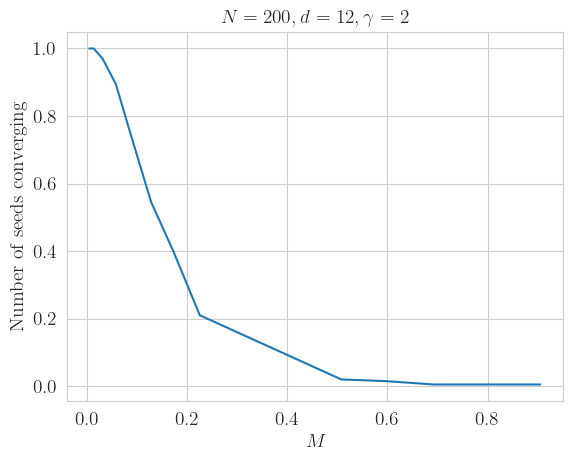

In [163]:
list_of_Ms12_wierd = [2,6,14,26,40,58,78,102,230,270,314,410]
table_how_many_seeds_d12 = []
compteur = 0 
for element_M in list_of_Ms12_wierd:
    element_M = math.floor(element_M)
    element_M = math.floor(element_M)
    line_count = count_lines('Results_N200_d12/Results_BP_only_converged/Results_BP_M='+str(element_M)+'.dat')
    table_how_many_seeds_d12.append(line_count)
    if line_count <= 100 : 
        if compteur < 1:
            print(element_M*np.log(N)/(N*degree_12))
            compteur = compteur + 1 

plt.plot(np.array(list_of_Ms12_wierd)*np.log(N)/(N*degree_12),np.array(table_how_many_seeds_d12)*(1/200))
#plt.plot(np.array(list_of_Ms12)*np.log(N)/(N*degree_12),np.ones(len(list_of_Ms12)))

font = 14
plt.xlabel(r"$M$",fontsize=font)
plt.ylabel("Number of seeds converging",fontsize=font)
plt.title(r"$N=200, d=12, \gamma = 2$",fontsize=font)
plt.xticks(fontsize=font)
plt.yticks(fontsize=font)
plt.show()

0.38854327354685597


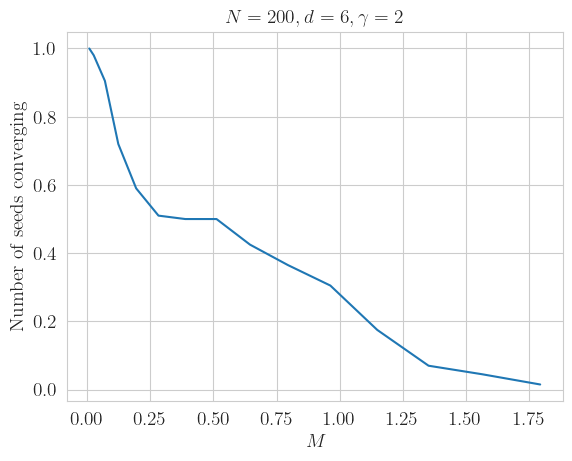

In [156]:
list_of_Ms6_wierd = list_of_Ms6[:15]
table_how_many_seeds_d6 = []
compteur = 0 
for element_M in list_of_Ms6_wierd:
    element_M = math.floor(element_M)
    element_M = math.floor(element_M)
    line_count = count_lines('Results_N200_d6/Results_BP_only_converged/Results_BP_M='+str(element_M)+'.dat')
    table_how_many_seeds_d6.append(line_count)
    if line_count <= 100 : 
        if compteur < 1:
            print(element_M*np.log(N)/(N*degree_6))
            compteur = compteur + 1 

plt.plot(np.array(list_of_Ms6_wierd)*np.log(N)/(N*degree_6),np.array(table_how_many_seeds_d6)*(1/200))

font = 14
plt.xlabel(r"$M$",fontsize=font)
plt.ylabel("Number of seeds converging",fontsize=font)
plt.title(r"$N=200, d=6, \gamma = 2$",fontsize=font)
plt.xticks(fontsize=font)
plt.yticks(fontsize=font)
plt.show()